In [1]:
import numpy as np
import pandas as pd
import math

# TASK 1

### Reading Dataset

In [2]:
path="dataset.csv"
df=pd.read_csv(path)
df

,Smoke,Lungs Capacity,Cancer
0,0,10,No
1,0,11,No
2,1,10,No
3,2,9,No
4,0,9,No
5,1,9,Yes
6,3,10,No
7,3,8,Yes
8,3,8,Yes
9,3,9,No


### Implementation of KNN class 

In [3]:
class KNN:
    def __init__(self, k):  # constructor
        self.k = k
        
    def fit(self, X, y): #this function takes the training X data and training Y data 
        self.X_train = X
        self.y_train = y
        
    def distance(self, X1, X2):
        X1 = np.array(X1)
        X2 = np.array(X2)
        
        # To make sure both X1 and X2 are 1-dimensional arrays
        if X1.ndim > 1 or X2.ndim > 1:
            raise ValueError("Input arrays must be 1-dimensional.")
        
        # Calculating Euclidean distance
        return np.sqrt(np.sum((X2 - X1) ** 2))
    
    def predict(self, X_test):
        final_output = []
        for i in range(len(X_test)):
            d = []
            votes = {}
            for j in range(len(self.X_train)):
                dist = self.distance(self.X_train[j], X_test[i])
                d.append([dist, j])
            d.sort()
            d = d[:self.k]
            for dist, j in d:
                vote = self.y_train[j]
                if vote in votes:
                    votes[vote] += 1
                else:
                    votes[vote] = 1
            max_vote = max(votes, key=votes.get)
            final_output.append(max_vote)
            
        return final_output
    
    def score(self, X_test, y_test):
        predictions = self.predict(X_test)
        return (predictions == y_test).sum() / len(y_test)

### Object of the calss


In [4]:
x=KNN(3)

### Separating Numerical Data for testing and training

In [5]:
X = df[['Smoke', 'Lungs Capacity']].values
y = df['Cancer'].values

# Splitting the dataset into training and testing
x.X_train = X[:10]  #  first 10 rows  for training
x.y_train = y[:10]
X_test = X[10:]   #   rows are for testing


### Predictions

In [6]:
predictions = x.predict(X_test)
print("Predictions:", predictions)

Predictions: ['Yes', 'Yes', 'Yes', 'Yes', 'Yes']


### Prediction for example value

In [7]:
Smoke_Value=5
Lung_Value=8
X_test=np.array([5,6])
X_test

array([5, 6])

In [8]:
pre=x.predict(X_test)
pre

['Yes', 'Yes']

# TASK 2

### READING DATA FROM CSV FILE

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy import stats
import matplotlib.pyplot as plt

In [10]:
path2="fruit_data_with_colors _1_.csv"
df2=pd.read_csv(path2)

### Cleaning the data of outliers and NAN values and then splitting it for testing and training 

Biased output

In [11]:
# numeric_columns = df2.select_dtypes(include=['number']).columns
# # print(numeric_columns)
# df_numeric = df2[numeric_columns]
# # print(df_numeric)
# df_numeric=df_numeric.ffill()
# z_scores = stats.zscore(df2.select_dtypes(include=['number']))
# threshold = 1
# df_clean = df2[(z_scores < threshold).all(axis=1)]
# print(df_clean)

In [12]:
df2=df2.ffill()
numeric_columns = df2.select_dtypes(include=['number']).columns
df_numeric = df2[numeric_columns]
df_numeric = df_numeric.ffill()
# print(df_numeric)
df_numeric

,fruit_label,mass,width,height,color_score
0,1,192.0,8.4,7.3,0.55
1,1,180.0,8.0,6.8,0.59
2,1,176.0,7.4,7.2,0.60
3,2,86.0,6.2,4.7,0.80
4,2,84.0,6.0,4.6,0.79
5,2,80.0,5.8,4.3,0.77
6,2,80.0,5.9,4.3,0.81
7,2,76.0,5.8,4.0,0.81
8,1,178.0,7.1,7.8,0.92
9,1,172.0,7.4,7.0,0.89


In [13]:
z_scores = stats.zscore(df_numeric)
z_scores

,fruit_label,mass,width,height,color_score
0,-1.696505,-0.158780,1.642566,-0.285981,-2.832406
1,-1.696505,-0.161925,1.156480,-0.662272,-2.260684
2,-1.696505,-0.162974,0.427351,-0.361239,-2.117753
3,-0.811372,-0.186565,-1.030907,-2.242694,0.740856
4,-0.811372,-0.187089,-1.273950,-2.317953,0.597926
5,-0.811372,-0.188138,-1.516993,-2.543727,0.312065
6,-0.811372,-0.188138,-1.395472,-2.543727,0.883787
7,-0.811372,-0.189187,-1.516993,-2.769502,0.883787
8,-1.696505,-0.162449,0.062786,0.090310,2.456022
9,-1.696505,-0.164022,0.427351,-0.511756,2.027231


In [14]:
threshold = 3
df_clean = df2[(z_scores < threshold).all(axis=1)]
df_clean = df_clean.select_dtypes(include=['number']).columns
# print(df_clean)
# df_clean.dtype

In [15]:
from sklearn.model_selection import train_test_split
X = df_numeric.drop('fruit_label', axis=1) 
y = df_numeric['fruit_label']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# print(X_train)
# print(X_test)
# print(y_test)
# print(y_train)

### Applying the KNN model 

In [16]:
k_range=range(1,11)
accuracy_list=[]
for i in k_range:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_predict=knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    accuracy_list.append(accuracy)
    print(f"Accuracy for K {i+1} :", accuracy)

Accuracy for K 2 : 0.6111111111111112
Accuracy for K 3 : 0.5555555555555556
Accuracy for K 4 : 0.6111111111111112
Accuracy for K 5 : 0.6111111111111112
Accuracy for K 6 : 0.5
Accuracy for K 7 : 0.5
Accuracy for K 8 : 0.5
Accuracy for K 9 : 0.5
Accuracy for K 10 : 0.5
Accuracy for K 11 : 0.5555555555555556


### Plot

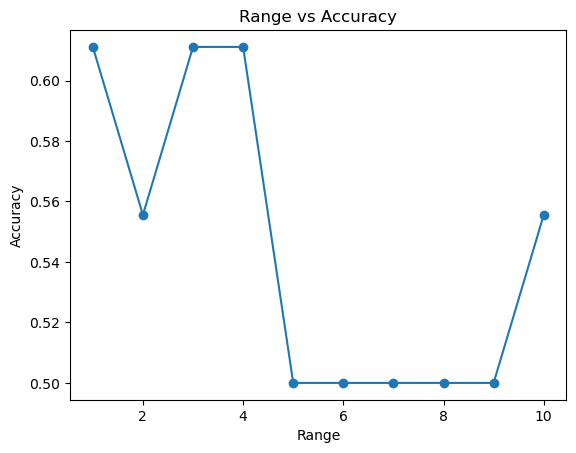

In [17]:
plt.plot(k_range, accuracy_list,marker='o')
plt.xlabel('Range')
plt.ylabel('Accuracy')
plt.title('Range vs Accuracy')
plt.show()